In [21]:
%matplotlib widget
import matplotlib.pyplot as plt
import os
os.environ['USE_PYGEOS'] = '0'
import geopandas as gpd
import pandas as pd
from shapely.geometry import LineString
import datetime
import numpy as np
from pyproj import Transformer
from pyproj import CRS
from shapely import MultiPoint

Clip Spatial

In [22]:
cycle = 14

kml_file = '/home/jovyan/shared-public/ICESat-2-Hackweek/ground_tracks/cycle%02i_1hz_points.pkl' % cycle
search_file = 'search_circle_ll.geojson'

geo_kml = pd.read_pickle(kml_file)
geo_search = gpd.GeoDataFrame.from_file(search_file)

# Clip gdf 'geo_kml' of kmls with gdf 'geo_search' of AOI (circle polygon)
geo_clipped_df = gpd.clip(geo_kml, geo_search).copy()
geo_clipped_df.sort_values(by='timestamp', inplace=True)
geo_clipped_df.reset_index(inplace=True, drop=True)

In [24]:
geo_clipped = geo_clipped_df.copy()

In [25]:
# add linestrings to the file
linestrings = geo_clipped.groupby(['rgt'])['lat','lon'].apply(lambda x: LineString(list(zip(x.lon.tolist(),x.lat.tolist()))))
times = geo_clipped.groupby(by='rgt')['timestamp'].mean()
dflines = gpd.GeoDataFrame(times, geometry=linestrings, crs="EPSG:4326")
dflines['time_str'] = [datetime.datetime.strftime(datetime.datetime.fromtimestamp(t), '%a %Y-%b-%d %H:%M:%S') for t in dflines.timestamp]
dflines.reset_index(inplace=True)

# add the initial search area
geo = geo_search.copy()
geo['rgt'] = 'none'
geo['timestamp'] = 0
geo['time_str'] = 'none'

# put all of the dataframes together
df_out = pd.concat((geo, dflines, geo_clipped[dflines.keys()]))
df_out.reset_index(inplace=True, drop=True)
df_out.explore()

/tmp/ipykernel_1082/2568753503.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  linestrings = geo_clipped.groupby(['rgt'])['lat','lon'].apply(lambda x: LineString(list(zip(x.lon.tolist(),x.lat.tolist()))))


In [49]:
geo_clipped_df

,lat,lon,rgt,timestamp,time_str,geometry
0,69.196272,-49.244672,224,1.641423e+09,Wed 2022-Jan-05 22:53:23,POINT (-49.24467 69.19627)
1,69.133084,-49.266284,224,1.641423e+09,Wed 2022-Jan-05 22:53:24,POINT (-49.26628 69.13308)
2,69.069893,-49.287795,224,1.641423e+09,Wed 2022-Jan-05 22:53:25,POINT (-49.28780 69.06989)
3,69.006701,-49.309207,224,1.641423e+09,Wed 2022-Jan-05 22:53:26,POINT (-49.30921 69.00670)
4,68.943506,-49.330521,224,1.641423e+09,Wed 2022-Jan-05 22:53:27,POINT (-49.33052 68.94351)
5,68.880308,-49.351736,224,1.641423e+09,Wed 2022-Jan-05 22:53:28,POINT (-49.35174 68.88031)
6,68.817109,-49.372855,224,1.641423e+09,Wed 2022-Jan-05 22:53:29,POINT (-49.37285 68.81711)
7,69.087951,-50.060471,285,1.641768e+09,Sun 2022-Jan-09 22:45:05,POINT (-50.06047 69.08795)
8,69.024759,-50.081911,285,1.641768e+09,Sun 2022-Jan-09 22:45:06,POINT (-50.08191 69.02476)
9,68.851957,-49.506167,338,1.642067e+09,Thu 2022-Jan-13 09:51:26,POINT (-49.50617 68.85196)


In [51]:
from pyproj.aoi import AreaOfInterest
from pyproj.database import query_utm_crs_info

geo_clipped = geo_clipped_df.copy()
#geo_clipped = geo_clipped[geo_clipped.rgt == geo_clipped.rgt.iloc[0]].copy()

crs_lonlat = CRS('epsg:4326')

distances = [-3345, -3255, -45, 45, 3255, 3345]
spots = ['1l', '1r', '2l', '2r', '3l', '3r']
for s in spots:
    for l in ['lon', 'lat']:
        geo_clipped['%s_%s' % (s,l)] = np.nan

for rgt in np.unique(geo_clipped.rgt):
    
    df_rgt = geo_clipped[geo_clipped.rgt == rgt]
    n_pts = len(df_rgt)
    
    for i in range(n_pts):
        
        thispt = df_rgt.iloc[i]
        # cust = CRS("+proj=tmerc +lat_0={0} +lon_0={1} +datum=WGS84 +units=m".format(thispt.lat, thispt.lon))
        # cust = CRS('+proj=tmer +lat_0=%.5f +lon_0=%.5f +k=1 +x_0=0 +y_0=0 +ellps=WGS84 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs' % (thispt.lat, thispt.lon))
        # cust = CRS('+proj=tmerc +lat_0={0} +lon_0={1} +k=1 +x_0=0 +y_0=0 +ellps=WGS84 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs'.format(thispt.lat, thispt.lon))
        # utm_crs_list = query_utm_crs_info(datum_name="WGS 84",area_of_interest=AreaOfInterest(
        #         west_lon_degree=thispt.lon,south_lat_degree=thispt.lat,east_lon_degree=thispt.lon,north_lat_degree=thispt.lat,),)
        # cust = CRS.from_epsg(utm_crs_list[0].code)
        # cust = CRS("+proj=tmerc +lat_0={0} +lon_0={1} +datum=WGS84 +units=m".format(thispt.lat, thispt.lon))
        cust = CRS("EPSG:3995")
        
        lonlat2xy = Transformer.from_crs(crs_lonlat, cust)
        xy2lonlat = Transformer.from_crs(cust, crs_lonlat)
        
        edges = np.clip(np.array([i-1, i+1]), 0, n_pts-1)
        pt0 = df_rgt.iloc[edges[0]]
        pt1 = df_rgt.iloc[edges[1]]
        
        x, y = lonlat2xy.transform(thispt.lon, thispt.lat)
        x0, y0 = lonlat2xy.transform(pt0.lon, pt0.lat)
        x1, y1 = lonlat2xy.transform(pt1.lon, pt1.lat)
        dx = x1 - x0
        dy = y1 - y0
        normal = np.array([-dy, dx])
        unit_normal = normal / np.linalg.norm(normal)
        print(rgt, edges, dx, dy, unit_normal)
        
        for i,d in enumerate(distances):
            x_beam, y_beam = np.array([x,y]) + d * unit_normal
            # print(d, unit_normal, d * unit_normal, x_beam, y_beam)
            lon_beam, lat_beam = xy2lonlat.transform(x_beam, y_beam)
            geo_clipped.loc[thispt.name, '%s_lon' % spots[i]] = lon_beam
            geo_clipped.loc[thispt.name, '%s_lat' % spots[i]] = lat_beam

geo_clipped['geometry'] = geo_clipped.apply(lambda x: MultiPoint(np.array(x.iloc[6:]).reshape(-1,2)), axis=1)

df_ex = pd.concat((df_out, geo_clipped[df_out.keys()]))
# df_ex = geo_clipped

df_ex.iloc[1:,:].explore()

# filename_out = 'test_beams.geojson'
#df_ex.to_file(filename_out, driver="GeoJSON") 

224 [0 1] 4848.338083315641 -40945.26963865757 [0.99306238 0.11758873]
224 [0 2] 9578.646322276443 -81891.95739930682 [0.99322878 0.11617487]
224 [1 3] 9343.142796523869 -81894.70679410361 [0.9935549  0.11335196]
224 [2 4] 9108.745790902525 -81897.28287062608 [0.99387168 0.11053999]
224 [3 5] 8875.443765074015 -81899.68638213724 [0.99417922 0.1077389 ]
224 [4 6] 8643.225330483168 -81901.91807202622 [0.99447764 0.10494863]
224 [5 6] 4263.692798748612 -40951.4955270607 [0.99462363 0.10355592]
285 [0 1] 5037.893112216145 -41926.772310649976 [0.99285811 0.11930117]
285 [0 1] 5037.893112216145 -41926.772310649976 [0.99285811 0.11930117]
338 [0 1] 30930.57698660344 27509.65579872951 [-0.66457716  0.74721964]
338 [0 2] 61937.035606496036 55033.56933167018 [-0.66421837  0.7475386 ]
338 [1 3] 62089.85550686717 55061.99761709012 [-0.66349515  0.74818059]
338 [2 4] 62244.80349200964 55090.25073315762 [-0.66275973  0.74883212]
338 [3 5] 62401.909427654 55118.327068341896 [-0.662012    0.74949323]


In [53]:
lonlat2xy

<Conversion Transformer: pipeline>
Description: Arctic Polar Stereographic
Area of Use:
- name: Northern hemisphere - north of 60°N onshore and offshore, including Arctic.
- bounds: (-180.0, 60.0, 180.0, 90.0)

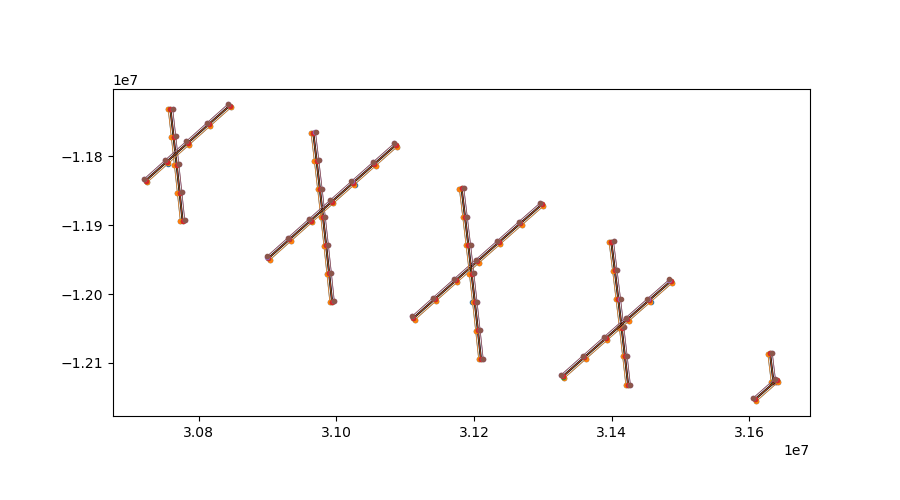

In [52]:
fig, ax = plt.subplots(figsize=[9,5])
for rgt in np.unique(geo_clipped.rgt):
    df_rgt = geo_clipped[geo_clipped.rgt == rgt]
    x, y = lonlat2xy.transform(df_rgt.lon, df_rgt.lat)
    ax.plot(x,y,'k-')
    for i,s in enumerate(spots):
        x,y = lonlat2xy.transform(df_rgt['%s_lon'%s], df_rgt['%s_lat'%s])
        ax.plot(x,y,marker='o',lw=0.5,ms=3,c='C%i'%i)
        
ax.set_aspect('equal')

In [43]:
geo_clipped

,lat,lon,rgt,timestamp,time_str,geometry,1l_lon,1l_lat,1r_lon,1r_lat,2l_lon,2l_lat,2r_lon,2r_lat,3l_lon,3l_lat,3r_lon,3r_lat
0,69.196272,-49.244672,224,1.641423e+09,Wed 2022-Jan-05 22:53:23,"MULTIPOINT (-49.22266 69.17868, -49.22325 69.1...",-49.222661,69.178683,-49.223253,69.179156,-49.244376,69.196035,-49.244968,69.196508,-49.266095,69.213406,-49.266687,69.213880
1,69.133084,-49.266284,224,1.641423e+09,Wed 2022-Jan-05 22:53:24,"MULTIPOINT (-49.24426 69.11554, -49.24485 69.1...",-49.244257,69.115541,-49.244850,69.116013,-49.265988,69.132847,-49.266580,69.133320,-49.287722,69.150172,-49.288315,69.150645
2,69.069893,-49.287795,224,1.641423e+09,Wed 2022-Jan-05 22:53:25,"MULTIPOINT (-49.26575 69.05240, -49.26634 69.0...",-49.265751,69.052403,-49.266344,69.052874,-49.287499,69.069658,-49.288092,69.070129,-49.309251,69.086931,-49.309844,69.087402
3,69.006701,-49.309207,224,1.641423e+09,Wed 2022-Jan-05 22:53:26,"MULTIPOINT (-49.28715 68.98926, -49.28774 68.9...",-49.287145,68.989263,-49.287739,68.989732,-49.308911,69.006466,-49.309504,69.006935,-49.330680,69.023687,-49.331274,69.024157
4,68.943506,-49.330521,224,1.641423e+09,Wed 2022-Jan-05 22:53:27,"MULTIPOINT (-49.30844 68.92612, -49.30904 68.9...",-49.308441,68.926120,-49.309035,68.926588,-49.330224,68.943272,-49.330818,68.943740,-49.352010,68.960442,-49.352605,68.960910
5,68.880308,-49.351736,224,1.641423e+09,Wed 2022-Jan-05 22:53:28,"MULTIPOINT (-49.32964 68.86297, -49.33023 68.8...",-49.329640,68.862975,-49.330234,68.863441,-49.351439,68.880075,-49.352034,68.880542,-49.373243,68.897194,-49.373837,68.897661
6,68.817109,-49.372855,224,1.641423e+09,Wed 2022-Jan-05 22:53:29,"MULTIPOINT (-49.35074 68.79982, -49.35134 68.8...",-49.350743,68.799821,-49.351338,68.800286,-49.372557,68.816876,-49.373152,68.817342,-49.394376,68.833949,-49.394971,68.834415
7,69.087951,-50.060471,285,1.641768e+09,Sun 2022-Jan-09 22:45:05,"MULTIPOINT (-50.03835 69.06981, -50.03894 69.0...",-50.038348,69.069813,-50.038943,69.070301,-50.060174,69.087706,-50.060769,69.088195,-50.082004,69.105620,-50.082599,69.106108
8,69.024759,-50.081911,285,1.641768e+09,Sun 2022-Jan-09 22:45:06,"MULTIPOINT (-50.05977 69.00666, -50.06037 69.0...",-50.059773,69.006662,-50.060369,69.007148,-50.081613,69.024515,-50.082209,69.025002,-50.103457,69.042388,-50.104053,69.042876
9,68.851957,-49.506167,338,1.642067e+09,Thu 2022-Jan-13 09:51:26,"MULTIPOINT (-49.52827 68.83445, -49.52767 68.8...",-49.528269,68.834451,-49.527675,68.834922,-49.506464,68.851722,-49.505869,68.852192,-49.484656,68.868966,-49.484061,68.869436


In [10]:
geo_clipped['1l_lon'], geo_clipped['1l_lat']

SyntaxError: invalid decimal literal (3537845628.py, line 1)

In [ ]:
from shapely import MultiPoint
r = geo_clipped.iloc[0]
geo_clipped['geometry'] = geo_clipped.apply(lambda x: MultiPoint(np.array(x.iloc[6:]).reshape(-1,2)), axis=1)

In [ ]:
geo_clipped

In [ ]:
len(geo_clipped_df)

In [ ]:
df_ex.iloc[1:,:]

In [ ]:
# add linestrings to the file
linestrings = geo_clipped.groupby(['rgt'])['lat','lon'].apply(lambda x: LineString(list(zip(x.lon.tolist(),x.lat.tolist()))))
times = geo_clipped.groupby(by='rgt')['timestamp'].mean()
dflines = gpd.GeoDataFrame(times, geometry=linestrings, crs="EPSG:4326")
dflines['time_str'] = [datetime.datetime.strftime(datetime.datetime.fromtimestamp(t), '%a %Y-%b-%d %H:%M:%S') for t in dflines.timestamp]
dflines.reset_index(inplace=True)

# add the initial search area
geo = geo_search.copy()
geo['rgt'] = 'none'
geo['timestamp'] = 0
geo['time_str'] = 'none'

# put all of the dataframes together
df_out = pd.concat((geo, dflines, geo_clipped[dflines.keys()]))
df_out.reset_index(inplace=True, drop=True)
df_out.explore()

In [ ]:
# save it all to an output file
filename_out = search_file[:search_file.rfind('.')] + '_results.geojson'
df_out.to_file(filename_out, driver="GeoJSON") 
print('Wrote results to %s!' % filename_out)
df_out